<a href="https://colab.research.google.com/github/fusichao/open-iris/blob/main/colab/MatchingEntities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/worldcoin/open-iris/blob/dev/colab/MatchingEntities.ipynb)

# IRIS: _Matching entities_ tutorial

This Jupyter Notebook will walk you through the basics of how to use matchers available in the `iris` package. From it you will learn how to:
- Use the `HammingDistanceMatcher` matcher to compute distance between two eyes.

## 0. Installing `iris` package in the `SERVER` environment.

Install `iris` package

In [1]:
!pip install onnx onnxruntime pydantic==1.10.16 huggingface-hub pyyaml
!pip install --no-deps open-iris

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.1/151.1 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 93.0 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.12.3
    Uninstalling pydantic-2.12.3:
      Successfully uninstalled pydantic-2.12.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.10 requires pydantic<3.0.0,>=2.0.0, but you have pydantic 1.10.16 which is incompatible.
google-genai 1.63.0 requires pydantic<3.0.0,>=2.9.0, but you have pydantic 1.10.16 which is incompatible.
albumentations 2.0.8 requires pydantic>=2.9.2, but you have pydantic 1.10.16 which is incompatible.
langchain-core 1.2.12 requires pydant

Verify installation by printing `iris` version

In [2]:
import iris

print(iris.__version__)

1.10.0


Download sample IR images for experimenting.

In [3]:
!wget https://wld-ml-ai-data-public.s3.amazonaws.com/public-iris-images/example_orb_image_1.png -O ./subject1_first_image.png
!wget https://wld-ml-ai-data-public.s3.amazonaws.com/public-iris-images/example_orb_image_2.png -O ./subject1_second_image.png
!wget https://wld-ml-ai-data-public.s3.amazonaws.com/public-iris-images/example_orb_image_3.png -O ./subject2_image.png

--2026-02-18 10:10:10--  https://wld-ml-ai-data-public.s3.amazonaws.com/public-iris-images/example_orb_image_1.png
Resolving wld-ml-ai-data-public.s3.amazonaws.com (wld-ml-ai-data-public.s3.amazonaws.com)... 16.15.203.225, 52.217.173.233, 16.182.68.185, ...
Connecting to wld-ml-ai-data-public.s3.amazonaws.com (wld-ml-ai-data-public.s3.amazonaws.com)|16.15.203.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 875520 (855K) [image/png]
Saving to: ‘./subject1_first_image.png’

./subject1_first_im 100%[===================>] 855.00K  --.-KB/s    in 0.1s    

2026-02-18 10:10:10 (6.03 MB/s) - ‘./subject1_first_image.png’ saved [875520/875520]

--2026-02-18 10:10:10--  https://wld-ml-ai-data-public.s3.amazonaws.com/public-iris-images/example_orb_image_2.png
Resolving wld-ml-ai-data-public.s3.amazonaws.com (wld-ml-ai-data-public.s3.amazonaws.com)... 16.15.203.225, 52.217.173.233, 16.182.68.185, ...
Connecting to wld-ml-ai-data-public.s3.amazonaws.com (wld-ml-ai-data

## 1. Use the `HammingDistanceMatcher` matcher to compute distance between two eyes.

Load all IR images with `opencv-python` package.

In [4]:
import cv2

subject1_first_image = cv2.imread("./subject1_first_image.png", cv2.IMREAD_GRAYSCALE)
subject1_second_image = cv2.imread("./subject1_second_image.png", cv2.IMREAD_GRAYSCALE)
subject2_image = cv2.imread("./subject2_image.png", cv2.IMREAD_GRAYSCALE)

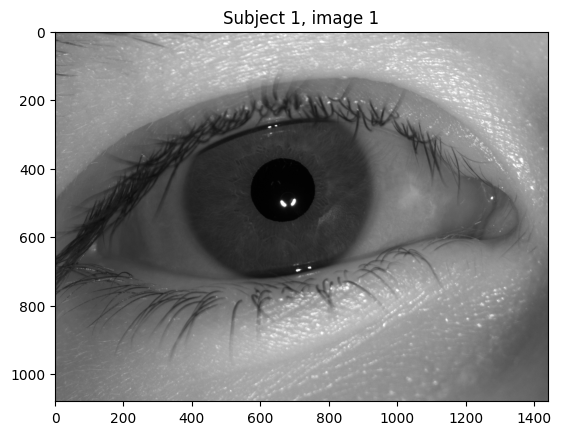

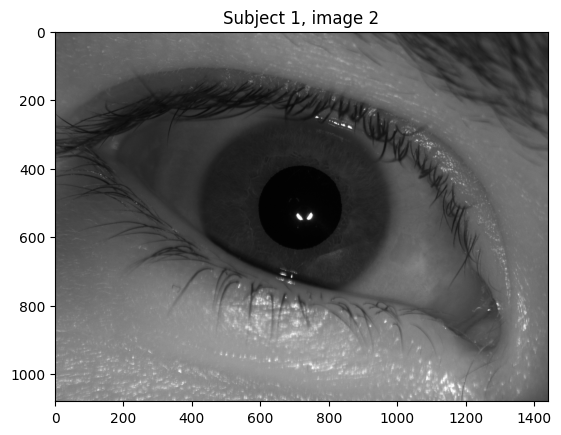

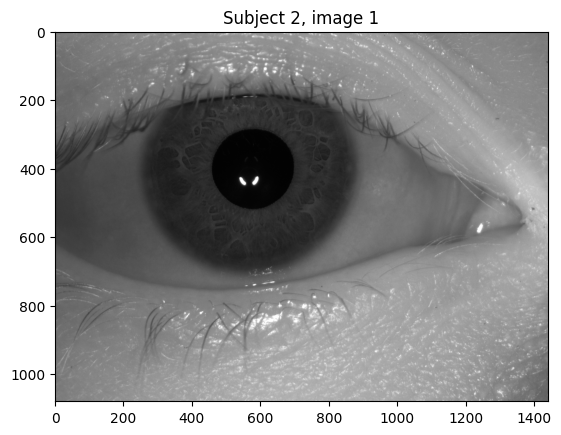

In [5]:
import matplotlib.pyplot as plt

plt.imshow(subject1_first_image, cmap='gray')
plt.title('Subject 1, image 1')
plt.show()

plt.imshow(subject1_second_image, cmap='gray')
plt.title('Subject 1, image 2')
plt.show()

plt.imshow(subject2_image, cmap='gray')
plt.title('Subject 2, image 1')
plt.show()

Create `IRISPipeline` object and compute `IrisTemplate`s for all images.

In [6]:
import iris

iris_pipeline = iris.IRISPipeline()

output_1 = iris_pipeline(iris.IRImage(img_data=subject1_first_image, image_id="subject1_first_image", eye_side="left"))
subject1_first_code = output_1['iris_template']

output_2 = iris_pipeline(iris.IRImage(img_data=subject1_second_image, image_id="subject1_second_image", eye_side="left"))
subject1_second_code = output_2['iris_template']

output_3 = iris_pipeline(iris.IRImage(img_data=subject2_image, image_id="subject2_image", eye_side="left"))
subject2_code = output_3['iris_template']

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


iris_semseg_upp_scse_mobilenetv2.onnx:   0%|          | 0.00/56.1M [00:00<?, ?B/s]

In [7]:
subject1_first_code.iris_codes[0].shape, subject1_first_code.iris_codes[1].shape

((16, 256, 2), (16, 256, 2))

In [8]:
subject1_first_code.mask_codes[0].shape, subject1_first_code.mask_codes[1].shape

((16, 256, 2), (16, 256, 2))

Create a `HammingDistanceMatcher` matcher object.
```python
def __init__(
        self,
        rotation_shift: int = 15,
        nm_dist: Optional[confloat(ge=0, le=1, strict=True)] = None,
        weights: Optional[List[np.ndarray]] = None,
    ) -> None:
        """Assign parameters.

        Args:
            rotation_shift (int): rotations allowed in matching, converted to shifts in columns. Defaults to 15.
            nm_dist (Optional[confloat(ge=0, le = 1, strict=True)]): nonmatch distance used for normalized HD. Optional paremeter for normalized HD. Defaults to None.
            weights (Optional[List[np.ndarray]]): list of weights table. Optional paremeter for weighted HD. Defaults to None.
        """
```

In [26]:
from typing import List, Optional, Tuple, Union

import numpy as np

from iris.io.dataclasses import IrisTemplate
from iris.io.errors import MatcherError

def normalized_HD(irisbitcount: int, maskbitcount: int, norm_mean: float, norm_gradient: float) -> float:
    """Perform normalized HD calculation.

    Args:
        irisbitcount (int): Nonmatched iriscode bit count.
        maskbitcount (int): Common maskcode bit count.
        norm_mean (float): Nonmatch distance used for normalized HD.
        norm_gradient (float): Gradient for linear approximation of normalization term.

    Returns:
        float: Normalized Hamming distance.
    """

    # Linear approximation to replace the previous sqrt-based normalization term.
    norm_HD = max(0, norm_mean - (norm_mean - irisbitcount / maskbitcount) * (norm_gradient * maskbitcount + 0.5))
    return norm_HD


def get_bitcounts(template_probe: IrisTemplate, template_gallery: IrisTemplate, shift: int) -> np.ndarray:
    """Get bit counts in iris and mask codes.

    Args:
        template_probe (IrisTemplate): Iris template from probe.
        template_gallery (IrisTemplate): Iris template from gallery.
        shift (int): Rotation shift (in columns)

    Returns:
        np.ndarray: Bit counts in iris and mask codes.
    """
    irisbits = [
        np.roll(probe_code, shift, axis=1) != gallery_code
        for probe_code, gallery_code in zip(template_probe.iris_codes, template_gallery.iris_codes)
    ]
    maskbits = [
        np.roll(probe_code, shift, axis=1) & gallery_code
        for probe_code, gallery_code in zip(template_probe.mask_codes, template_gallery.mask_codes)
    ]
    return irisbits, maskbits


def count_nonmatchbits(
    irisbits: np.ndarray,
    maskbits: np.ndarray,
    half_width: Optional[List[int]] = None,
    weights: Optional[List[np.ndarray]] = None,
) -> Union[Tuple[int, int], Tuple[List[int], List[int]]]:
    """Count nonmatch bits for Hamming distance.

    Args:
        irisbits (np.ndarray): Nonmatch irisbits.
        maskbits (np.ndarray): Common maskbits.
        half_width (Optional[np.ndarray] = None): List of half of code width. Optional parameter for scoring the upper and lower halves separately. Defaults to None.
        weights (Optional[np.ndarray] = None): List of weights table. Optional parameter for weighted HD. Defaults to None.

    Returns:
        Tuple[int, int]: Total nonmatch iriscode bit count and common maskcode bit count, could be a list for top and bottom iris separately.
    """
    if weights:
        irisbitcount = [np.sum((x & y) * z, axis=0) / z.sum() * z.size for x, y, z in zip(irisbits, maskbits, weights)]
        maskbitcount = [np.sum(y * z, axis=0) / z.sum() * z.size for y, z in zip(maskbits, weights)]
    else:
        irisbitcount = [np.sum(x & y, axis=0) for x, y in zip(irisbits, maskbits)]
        maskbitcount = [np.sum(y, axis=0) for y in maskbits]

    if half_width:
        totalirisbitcount = np.sum(
            [[np.sum(x[hw:, ...]) * 2, np.sum(x[:hw, ...]) * 2] for x, hw in zip(irisbitcount, half_width)], axis=0
        )
        totalmaskbitcount = np.sum(
            [[np.sum(y[hw:, ...]) * 2, np.sum(y[:hw, ...]) * 2] for y, hw in zip(maskbitcount, half_width)], axis=0
        )
    else:
        totalirisbitcount = np.sum(irisbitcount)
        totalmaskbitcount = np.sum(maskbitcount)

    return totalirisbitcount, totalmaskbitcount


def hamming_distance_array(
    template_probe: IrisTemplate,
    template_gallery: IrisTemplate,
    rotation_shift: int = 15,
    normalise: bool = False,
    norm_mean: float = 0.45,
    norm_gradient: float = 0.00005,
    separate_half_matching: bool = False,
    weights: Optional[List[np.ndarray]] = None,
):
    """Compute Hamming distance.

    Args:
        template_probe (IrisTemplate): Iris template from probe.
        template_gallery (IrisTemplate): Iris template from gallery.
        rotation_shift (int): Rotation allowed in matching, converted to columns. Defaults to 15.
        normalise (bool, optional): Flag to normalize HD. Defaults to False.
        norm_mean (float, optional): Nonmatch mean distance for normalized HD. Defaults to 0.45.
        norm_gradient (float): Gradient for linear approximation of normalization term. Defaults to 0.00005.
        separate_half_matching (bool, optional): Separate the upper and lower halves for matching. Defaults to False.
        weights (Optional[List[np.ndarray]], optional): List of weights table. Optional parameter for weighted HD. Defaults to None.

    Raises:
        MatcherError: If probe and gallery iris codes are of different sizes or number of columns of iris codes is not even or If weights (when defined) and iris codes are of different sizes.

    Returns:
        Tuple[float, int]: Minimum Hamming distance and corresponding rotation shift.
    """
    half_codewidth = []

    for probe_code, gallery_code in zip(template_probe.iris_codes, template_gallery.iris_codes):
        if probe_code.shape != gallery_code.shape:
            raise MatcherError("probe and gallery iris codes are of different sizes")
        if (probe_code.shape[1] % 2) != 0:
            raise MatcherError("number of columns of iris codes need to be even")
        if separate_half_matching:
            half_codewidth.append(int(probe_code.shape[1] / 2))

    if weights:
        for probe_code, w in zip(template_probe.iris_codes, weights):
            if probe_code.shape != w.shape:
                raise MatcherError("weights table and iris codes are of different sizes")

    # Calculate the Hamming distance between probe and gallery template.
    match_dist = 1
    match_rot = 0
    rotation_array = list(range(-rotation_shift, rotation_shift + 1))
    ret_array = np.zeros([len(rotation_array), 2], dtype=float)
    for k, current_shift in enumerate(rotation_array):
        irisbits, maskbits = get_bitcounts(template_probe, template_gallery, current_shift)
        totalirisbitcount, totalmaskbitcount = count_nonmatchbits(irisbits, maskbits, half_codewidth, weights)
        totalmaskbitcountsum = totalmaskbitcount.sum()
        if totalmaskbitcountsum == 0:
            continue

        if normalise:
            normdist = normalized_HD(totalirisbitcount.sum(), totalmaskbitcountsum, norm_mean, norm_gradient)
            if separate_half_matching:
                normdist0 = (
                    normalized_HD(totalirisbitcount[0], totalmaskbitcount[0], norm_mean, norm_gradient)
                    if totalmaskbitcount[0] > 0
                    else norm_mean
                )
                normdist1 = (
                    normalized_HD(totalirisbitcount[1], totalmaskbitcount[1], norm_mean, norm_gradient)
                    if totalmaskbitcount[0] > 0
                    else norm_mean
                )
                Hdist = np.mean(
                    [
                        normdist,
                        (normdist0 * totalmaskbitcount[0] + normdist1 * totalmaskbitcount[1]) / totalmaskbitcountsum,
                    ]
                )
            else:
                Hdist = normdist
        else:
            Hdist = totalirisbitcount.sum() / totalmaskbitcountsum

        ret_array[k, 0] = Hdist
        ret_array[k, 1] = current_shift

    return ret_array




In [27]:
from typing import List, Optional

import numpy as np
from pydantic import confloat, conint

from iris.io.dataclasses import IrisTemplate
from iris.nodes.matcher.hamming_distance_matcher_interface import Matcher
from iris.nodes.matcher.utils import hamming_distance


class HammingDistanceMatcher(Matcher):
    """Hamming distance Matcher with additional optional features.

    Algorithm steps:
       1) Calculate counts of nonmatch irisbits (IB_Counts) in common unmasked region and the counts of common maskbits (MB_Counts) in common unmasked region for both upper and lower half of iris, respectively.
       2) If parameter norm_mean is defined, calculate normalized Hamming distance (NHD) based on IB_Counts, MB_Counts and norm_mean.
       3) If parameter weights is defined, calculate weighted Hamming distance (WHD) based on IB_Counts, MB_Counts and weights.
       4) If parameters norm_mean and weights are both defined, calculate weighted normalized Hamming distance (WNHD) based on IB_Counts, MB_Counts, norm_mean and weights.
       5) Otherwise, calculate Hamming distance (HD) based on IB_Counts and MB_Counts.
       6) If parameter rotation_shift is > 0, repeat the above steps for additional rotations of the iriscode.
       7) Return the minimum distance from above calculations.
    """

    class Parameters(Matcher.Parameters):
        """HammingDistanceMatcher parameters."""

        rotation_shift: conint(ge=0, strict=True)
        normalise: bool
        norm_mean: confloat(ge=0, le=1, strict=True)
        norm_gradient: float
        separate_half_matching: bool
        weights_path: Optional[str]
        weights: Optional[List[np.ndarray]]

    __parameters_type__ = Parameters

    def __init__(
        self,
        rotation_shift: conint(ge=0, strict=True) = 15,
        normalise: bool = True,
        norm_mean: confloat(ge=0, le=1, strict=True) = 0.45,
        norm_gradient: float = 0.00005,
        separate_half_matching: bool = True,
        weights_path: Optional[str] = None,
        weights: Optional[List[np.ndarray]] = None,
    ) -> None:
        """Assign parameters.

        Args:
            rotation_shift (Optional[conint(ge=0, strict=True)], optional): Rotation shifts allowed in matching (in columns). Defaults to 15.
            normalise (bool, optional): Flag to normalize HD. Defaults to True.
            norm_mean (Optional[confloat(ge=0, le = 1, strict=True)], optional): Nonmatch distance used for normalized HD. Optional parameter for normalized HD. Defaults to 0.45.
            norm_gradient: float, optional): Gradient for linear approximation of normalization term. Defaults to 0.00005.
            separate_half_matching (bool, optional): Separate the upper and lower halves for matching. Defaults to True.
            weights_path (Optional[str], optional): Path to the weights table. Optional parameter for weighted HD. Defaults to None.
            weights (Optional[List[np.ndarray]], optional): list of weights table. Optional parameter for weighted HD. Defaults to None.
        """
        if weights_path is not None:
            weights = self.load_weights(weights_path)
        super().__init__(
            rotation_shift=rotation_shift,
            normalise=normalise,
            norm_mean=norm_mean,
            norm_gradient=norm_gradient,
            separate_half_matching=separate_half_matching,
            weights_path=weights_path,
            weights=weights,
        )

    def run(self, template_probe: IrisTemplate, template_gallery: IrisTemplate) -> float:
        """Match iris templates using Hamming distance.

        Args:
            template_probe (IrisTemplate): Iris template from probe.
            template_gallery (IrisTemplate): Iris template from gallery.

        Returns:
            float: matching distance.
        """
        score, _ = hamming_distance(
            template_probe=template_probe,
            template_gallery=template_gallery,
            rotation_shift=self.params.rotation_shift,
            normalise=self.params.normalise,
            norm_mean=self.params.norm_mean,
            norm_gradient=self.params.norm_gradient,
            separate_half_matching=self.params.separate_half_matching,
            weights=self.params.weights,
        )

        return score

    def run_array(self, template_probe: IrisTemplate, template_gallery: IrisTemplate) -> float:
        """Match iris templates using Hamming distance.

        Args:
            template_probe (IrisTemplate): Iris template from probe.
            template_gallery (IrisTemplate): Iris template from gallery.

        Returns:
            float: matching distance.
        """
        ret_array = hamming_distance_array(
            template_probe=template_probe,
            template_gallery=template_gallery,
            rotation_shift=self.params.rotation_shift,
            normalise=self.params.normalise,
            norm_mean=self.params.norm_mean,
            norm_gradient=self.params.norm_gradient,
            separate_half_matching=self.params.separate_half_matching,
            weights=self.params.weights,
        )

        return ret_array


In [23]:
matcher = HammingDistanceMatcher(rotation_shift=30)

Call `run` method and provide two `IrisTemplate`s to compute distances.
```python
def run(self, template_probe: IrisTemplate, template_gallery: IrisTemplate) -> float:
```

In [28]:
ret1 = matcher.run_array(subject1_first_code, subject1_second_code)

ret2 = matcher.run_array(subject1_first_code, subject2_code)


In [37]:
import matplotlib.pyplot as plt
import numpy as np

def plot_curve_from_array(X):
    """
    绘制从二维数组获取的曲线

    参数:
    X: ndarray, 形状为(n, 2)
        第0行: y数据 (无量纲)
        第1行: x坐标 (单位: 角度)
    """
    # 验证输入数据形状
    if X.shape[1] != 2:
        raise ValueError("输入数组X必须为2行n列的二维数组")

    # 提取数据
    y_data = X[:, 0]  # 第一行：y数据
    x_coords = X[:, 1]  # 第二行：x坐标（角度）
    # 创建图形，固定尺寸
    plt.figure(figsize=(8, 6))

    # 绘制曲线
    plt.plot(x_coords, y_data, 'b-', linewidth=2)

    # 设置轴标签
    plt.xlabel('Angle (degrees)', fontsize=12)
    plt.ylabel('y', fontsize=12)

    # 固定坐标轴范围
    plt.xlim(-30, 30)
    plt.ylim(0, 1.0)

    # 添加网格
    plt.grid(True, alpha=0.3)

    # 添加标题
    plt.title('Curve Plot: y vs Angle', fontsize=14)

    # 自动调整布局
    plt.tight_layout()

    # 显示图形
    plt.show()

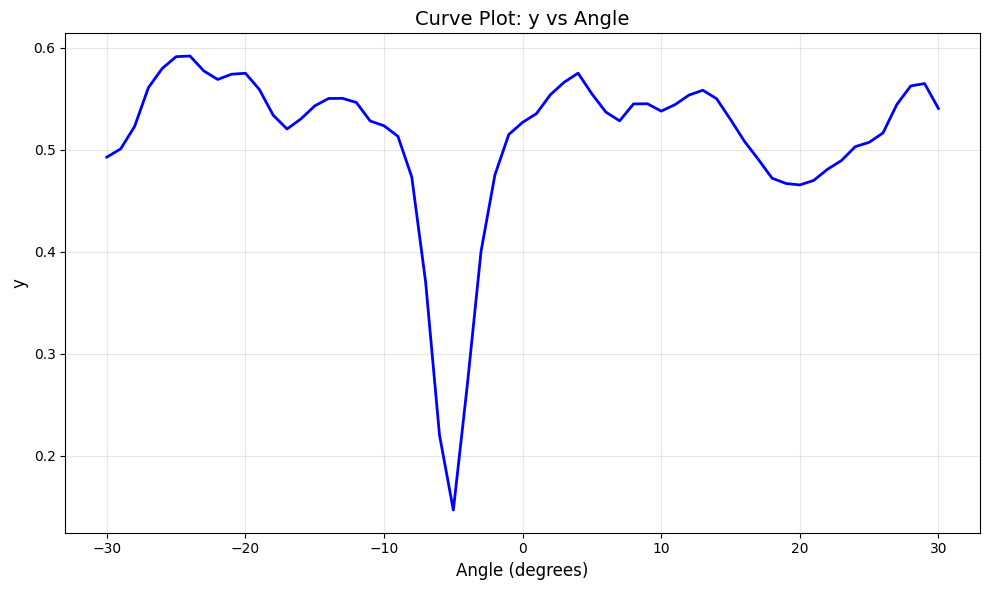

In [34]:
plot_curve_from_array(ret1)

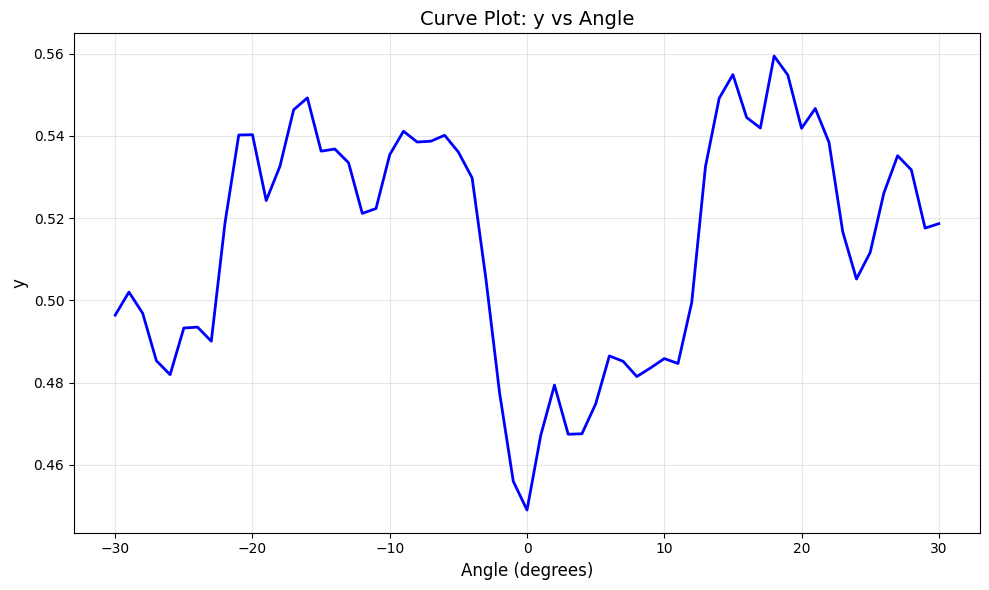

In [35]:
plot_curve_from_array(ret2)

In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import os

def plot_curve_from_array2(X):
    """
    绘制从二维数组获取的曲线并返回图像数组

    参数:
    X: ndarray, 形状为(n, 2)
        第0列: y数据 (无量纲)
        第1列: x坐标 (单位: 角度)

    返回:
    img: ndarray, 形状为(h, w, 3)的RGB图像数组
    """
    # 验证输入数据形状
    if X.shape[1] != 2:
        raise ValueError("输入数组X必须为n行2列的二维数组")

    # 提取数据
    y_data = X[:, 0]  # 第一列：y数据
    x_coords = X[:, 1]  # 第二列：x坐标（角度）

    # 创建图形，固定尺寸
    fig, ax = plt.subplots(figsize=(8, 6))

    # 绘制曲线
    ax.plot(x_coords, y_data, 'b-', linewidth=2)

    # 设置轴标签
    ax.set_xlabel('Angle (degrees)', fontsize=12)
    ax.set_ylabel('y', fontsize=12)

    # 固定坐标轴范围
    ax.set_xlim(-30, 30)
    ax.set_ylim(0, 1.0)

    # 添加网格
    ax.grid(True, alpha=0.3)

    # 添加标题
    ax.set_title('Curve Plot: y vs Angle', fontsize=14)

    # 自动调整布局
    fig.tight_layout()

    # 将图形转换为RGB图像数组
    canvas = FigureCanvas(fig)
    canvas.draw()

    # 修复方法：使用buffer_rgba()替代tostring_rgb()
    buf = canvas.buffer_rgba()
    img_array = np.frombuffer(buf, dtype=np.uint8)
    img_array = img_array.reshape(canvas.get_width_height()[::-1] + (4,))

    # 转换为RGB（去掉alpha通道）
    img_array = cv2.cvtColor(img_array, cv2.COLOR_RGBA2RGB)

    # 关闭图形以释放内存
    plt.close(fig)

    return img_array


In [75]:
def process_video_with_fun1(extracter, matcher, input_video_path, output_video_path=None):
    """
    处理视频：逐帧调用fun1，生成曲线图，并保存为新视频

    参数:
    fun1: 函数，输入为视频帧，输出为X数组
    input_video_path: str，输入视频路径
    output_video_path: str，输出视频路径，默认为None则自动生成

    返回:
    None
    """
    # 自动生成输出视频路径
    if output_video_path is None:
        base_name = os.path.splitext(input_video_path)[0]
        output_video_path = f"{base_name}_ret.mp4"

    # 打开视频
    cap = cv2.VideoCapture(input_video_path)
    if not cap.isOpened():
        raise ValueError(f"无法打开视频: {input_video_path}")

    # 获取视频信息
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # 准备视频写入器
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')

    # 先处理第一帧以获取图像尺寸
    ret, first_frame = cap.read()
    if not ret:
        raise ValueError("无法读取视频帧")
    first_frame = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
    ref_code = extracter(first_frame)

    # 重置视频读取位置
    cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

    all_X = []
    # 处理第一帧以确定输出视频的尺寸
    X = matcher(ref_code, ref_code)
    sample_img = plot_curve_from_array2(X)
    height, width = sample_img.shape[:2]
    all_X.append(X.copy())

    # 创建视频写入器
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

    print(f"开始处理视频: {input_video_path}")
    print(f"视频信息: FPS={fps}, 总帧数={frame_count}")
    print(f"输出视频尺寸: {width}x{height}")

    # 逐帧处理
    frame_idx = 0
    while frame_idx <= 360:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        new_code = extracter(frame)

        # 调用fun1处理当前帧
        X = matcher(ref_code, new_code)
        all_X.append(X.copy())

        # 生成曲线图
        curve_img = plot_curve_from_array2(X)

        # 将RGB图像转换为BGR格式（OpenCV使用BGR）
        curve_img_bgr = cv2.cvtColor(curve_img, cv2.COLOR_RGB2BGR)

        # 写入输出视频
        out.write(curve_img_bgr)

        frame_idx += 1
        if frame_idx % 20 == 0:
          print(f"已处理 {frame_idx}/{frame_count} 帧")

    # 释放资源
    cap.release()
    out.release()
    cv2.destroyAllWindows()

    print(f"处理完成! 输出视频保存至: {output_video_path}")
    return np.array(all_X)

In [69]:
input_vid = r'/content/1.mp4'
output_vid = r'/content/1_ret.mp4'
# process_video_with_fun1(matcher.run_array, input_vid, output_vid)

In [71]:
def extractor(pic1):
  output_1 = iris_pipeline(iris.IRImage(img_data=pic1, image_id="subject1_first_image", eye_side="right"))
  code1 = output_1['iris_template']
  return code1

In [76]:
all_x = process_video_with_fun1(extractor, matcher.run_array, input_vid, output_vid)

开始处理视频: /content/1.mp4
视频信息: FPS=60, 总帧数=3699
输出视频尺寸: 800x600
已处理 20/3699 帧
已处理 40/3699 帧
已处理 60/3699 帧
已处理 80/3699 帧
已处理 100/3699 帧
已处理 120/3699 帧
已处理 140/3699 帧
已处理 160/3699 帧
已处理 180/3699 帧
已处理 200/3699 帧
已处理 220/3699 帧
已处理 240/3699 帧
已处理 260/3699 帧
已处理 280/3699 帧
已处理 300/3699 帧
已处理 320/3699 帧
已处理 340/3699 帧
已处理 360/3699 帧
处理完成! 输出视频保存至: /content/1_ret.mp4


In [77]:
all_x.shape

(362, 61, 2)

In [78]:
np.save('/content/video1_360.npy', all_x)

The recommended threshold is between 0.34 and 0.39 depending on the sensibitity of your use case, 0.37 is a good choice if you do not favor False Matches or False Non-Matches.

In this example, the two iris images from the same subject are clearly matched, and those form different subjects clearly non-matched.

### Thank you for making it to the end of this tutorial!